# Data Merge

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [49]:
os.environ["CUDA_VISIBLE_DEVICES"]='0'

### Data Path Setting

In [50]:
# csv = '/home/master/Jibum/Motion_Show/HAR/DataSet/'

# csv_ls = os.listdir(csv)

In [51]:
# DataSet = pd.DataFrame()

# for i in csv_ls:
#     df = pd.read_csv(csv + '/' + i)
#     DataSet = pd.concat([DataSet, df])

In [52]:
# DataSet.to_csv('/home/master/Jibum/Motion_Show/HAR/Dataset.csv')

In [53]:
DataSet = pd.read_csv('/home/master/Jibum/Motion_Show/HAR/Dataset.csv')
DataSet = DataSet.drop('Unnamed: 0', axis=1)

In [55]:
DataSet

,accelerometer_right_foot_x,accelerometer_right_foot_y,accelerometer_right_foot_z,gyroscope_right_foot_x,gyroscope_right_foot_y,gyroscope_right_foot_z,accelerometer_right_shin_x,accelerometer_right_shin_y,accelerometer_right_shin_z,gyroscope_right_shin_x,...,gyroscope_left_shin_z,accelerometer_left_thigh_x,accelerometer_left_thigh_y,accelerometer_left_thigh_z,gyroscope_left_thigh_x,gyroscope_left_thigh_y,gyroscope_left_thigh_z,EMG_right,EMG_left,activity
0,-9256,-3132,13492,125,-72,-128,-15056,744,-5952,-16,...,128,-2912,3828,16356,215,-18,39,127,127,sitting
1,-9256,-3104,13584,144,-77,-156,-15084,820,-6076,-2,...,118,-2896,3900,16464,217,-27,45,127,127,sitting
2,-9212,-3112,13576,157,-48,-157,-15112,696,-5992,-26,...,119,-2924,3912,16448,165,10,27,127,127,sitting
3,-9216,-3084,13572,129,-55,-110,-15120,796,-6036,5,...,148,-2904,4012,16540,159,-26,48,127,127,sitting
4,-9192,-3100,13596,119,-23,-151,-15084,740,-6176,-22,...,94,-2912,3924,16380,163,-31,66,127,127,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137274,-8864,-3604,12976,-120,168,-117,-15992,2100,-4912,86,...,-265,-16112,2828,-2076,-544,274,-1,124,117,standing
1137275,-8944,-3496,12900,-109,185,-132,-15856,2128,-4796,-14,...,-293,-16280,2296,-1672,-1091,229,39,126,129,standing
1137276,-8784,-3516,12920,-100,195,-173,-15644,1988,-4648,78,...,-238,-16296,2052,-972,-1464,115,106,122,132,standing
1137277,-8852,-3552,12824,-83,125,-151,-15712,1764,-4444,251,...,-145,-16224,1820,-1100,-998,1,197,127,123,standing


### Target Count

In [7]:
DataSet['activity'].value_counts()

walking             314966
standing            222345
going_up            135127
going_down          119819
up_by_elevator       89144
sitting              82574
down_by_elevator     68762
running              65917
standing_up          20506
sitting_down         18119
Name: activity, dtype: int64

### Data Columns

In [8]:
DataSet.columns

Index(['accelerometer_right_foot_x', 'accelerometer_right_foot_y',
       'accelerometer_right_foot_z', 'gyroscope_right_foot_x',
       'gyroscope_right_foot_y', 'gyroscope_right_foot_z',
       'accelerometer_right_shin_x', 'accelerometer_right_shin_y',
       'accelerometer_right_shin_z', 'gyroscope_right_shin_x',
       'gyroscope_right_shin_y', 'gyroscope_right_shin_z',
       'accelerometer_right_thigh_x', 'accelerometer_right_thigh_y',
       'accelerometer_right_thigh_z', 'gyroscope_right_thigh_x',
       'gyroscope_right_thigh_y', 'gyroscope_right_thigh_z',
       'accelerometer_left_foot_x', 'accelerometer_left_foot_y',
       'accelerometer_left_foot_z', 'gyroscope_left_foot_x',
       'gyroscope_left_foot_y', 'gyroscope_left_foot_z',
       'accelerometer_left_shin_x', 'accelerometer_left_shin_y',
       'accelerometer_left_shin_z', 'gyroscope_left_shin_x',
       'gyroscope_left_shin_y', 'gyroscope_left_shin_z',
       'accelerometer_left_thigh_x', 'accelerometer_left_thig

### Acc / Gyro / Acc+Gyro

In [9]:
Acc = DataSet[['accelerometer_right_foot_x', 'accelerometer_right_foot_y','accelerometer_right_foot_z',
               'accelerometer_right_shin_x', 'accelerometer_right_shin_y','accelerometer_right_shin_z',
               'accelerometer_right_thigh_x', 'accelerometer_right_thigh_y','accelerometer_right_thigh_z',
               'accelerometer_left_foot_x', 'accelerometer_left_foot_y','accelerometer_left_foot_z',
               'accelerometer_left_shin_x', 'accelerometer_left_shin_y','accelerometer_left_shin_z',
               'accelerometer_left_thigh_x', 'accelerometer_left_thigh_y','accelerometer_left_thigh_z']]

Gyro = DataSet[['gyroscope_right_foot_x', 'gyroscope_right_foot_y','gyroscope_right_foot_z',
               'gyroscope_right_shin_x', 'gyroscope_right_shin_y','gyroscope_right_shin_z',
               'gyroscope_right_thigh_x', 'gyroscope_right_thigh_y','gyroscope_right_thigh_z',
               'gyroscope_left_foot_x', 'gyroscope_left_foot_y','gyroscope_left_foot_z',
               'gyroscope_left_shin_x', 'gyroscope_left_shin_y','gyroscope_left_shin_z',
               'gyroscope_left_thigh_x', 'gyroscope_left_thigh_y','gyroscope_left_thigh_z']]

AccGyro = DataSet.drop(['EMG_right','EMG_left','activity'], axis=1)

### PCA

In [10]:
# PCA
accRF = DataSet[['accelerometer_right_foot_x','accelerometer_right_foot_y','accelerometer_right_foot_z']].values
accRS = DataSet[['accelerometer_right_shin_x','accelerometer_right_shin_y','accelerometer_right_shin_z']].values
accRT = DataSet[['accelerometer_right_thigh_x','accelerometer_right_thigh_y','accelerometer_right_thigh_z']].values
accLF = DataSet[['accelerometer_left_foot_x','accelerometer_left_foot_y','accelerometer_left_foot_z']].values
accLS = DataSet[['accelerometer_left_shin_x','accelerometer_left_shin_y','accelerometer_left_shin_z']].values
accLT = DataSet[['accelerometer_left_thigh_x','accelerometer_left_thigh_y','accelerometer_left_thigh_z']].values

In [11]:
gyroRF = DataSet[['gyroscope_right_foot_x', 'gyroscope_right_foot_y', 'gyroscope_right_foot_z']].values
gyroRS = DataSet[['gyroscope_right_shin_x', 'gyroscope_right_shin_y', 'gyroscope_right_shin_z']].values
gyroRT = DataSet[['gyroscope_right_thigh_x', 'gyroscope_right_thigh_y', 'gyroscope_right_thigh_z']].values
gyroLF = DataSet[['gyroscope_left_foot_x', 'gyroscope_left_foot_y', 'gyroscope_left_foot_z']].values
gyroLS = DataSet[['gyroscope_left_shin_x', 'gyroscope_left_shin_y', 'gyroscope_left_shin_z']].values
gyroLT = DataSet[['gyroscope_left_thigh_x', 'gyroscope_left_thigh_y', 'gyroscope_left_thigh_z']].values

In [12]:
from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA

accrf = SS().fit_transform(accRF)
accrs = SS().fit_transform(accRS)
accrt = SS().fit_transform(accRT)
acclf = SS().fit_transform(accLF)
accls = SS().fit_transform(accLS)
acclt = SS().fit_transform(accLT)

gyrorf = SS().fit_transform(gyroRF)
gyrors = SS().fit_transform(gyroRS)
gyrort = SS().fit_transform(gyroRT)
gyrolf = SS().fit_transform(gyroLF)
gyrols = SS().fit_transform(gyroLS)
gyrolt = SS().fit_transform(gyroLT)

pca = PCA(n_components=1)

accrf = pca.fit_transform(accrf)
accrfDF = pd.DataFrame(data = accrf, columns=['Acc_Right_Foot'])
accrs = pca.fit_transform(accrs)
accrsDF = pd.DataFrame(data = accrs, columns=['Acc_Right_Shin'])
accrt = pca.fit_transform(accrt)
accrtDF = pd.DataFrame(data = accrt, columns=['Acc_Right_thigh'])
acclf = pca.fit_transform(acclf)
acclfDF = pd.DataFrame(data = acclf, columns=['Acc_Left_Foot'])
accls = pca.fit_transform(accls)
acclsDF = pd.DataFrame(data = accls, columns=['Acc_Left_Shin'])
acclt = pca.fit_transform(acclt)
accltDF = pd.DataFrame(data = acclt, columns=['Acc_Left_thigh'])

gyrorf = pca.fit_transform(gyrorf)
gyrorfDF = pd.DataFrame(data = gyrorf, columns=['Gyro_Right_Foot'])
gyrors = pca.fit_transform(gyrors)
gyrorsDF = pd.DataFrame(data = gyrors, columns=['Gyro_Right_Shin'])
gyrort = pca.fit_transform(gyrort)
gyrortDF = pd.DataFrame(data = gyrort, columns=['Gyro_Right_thigh'])
gyrolf = pca.fit_transform(gyrolf)
gyrolfDF = pd.DataFrame(data = gyrolf, columns=['Gyro_Left_Foot'])
gyrols = pca.fit_transform(gyrols)
gyrolsDF = pd.DataFrame(data = gyrols, columns=['Gyro_Left_Shin'])
gyrolt = pca.fit_transform(gyrolt)
gyroltDF = pd.DataFrame(data = gyrolt, columns=['Gyro_Left_thigh'])


### PCA_Acc / PCA_Gyro / PCA_Acc_Gyro

In [13]:
Pca_Acc = pd.concat([accrfDF,accrsDF,accrtDF,acclfDF,acclsDF,accltDF], axis=1)
Pca_Gyro = pd.concat([gyrorfDF,gyrorsDF,gyrortDF,gyrolfDF,gyrolsDF,gyroltDF], axis=1)
Pca_Acc_Gyro = pd.concat([accrfDF,accrsDF,accrtDF,acclfDF,acclsDF,accltDF,gyrorfDF,gyrorsDF,gyrortDF,gyrolfDF,gyrolsDF,gyroltDF], axis=1)

# Training Data

In [14]:
print(Acc.shape)
print(Gyro.shape)
print(AccGyro.shape)
print(Pca_Acc.shape)
print(Pca_Gyro.shape)
print(Pca_Acc_Gyro.shape)

(1137279, 18)
(1137279, 18)
(1137279, 36)
(1137279, 6)
(1137279, 6)
(1137279, 12)


# Exponential Smoothing

In [15]:
# pip install --upgrade --no-deps statsmodels

In [16]:
# pip install patsy

In [17]:
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# EMGR = DataSet['EMG_right'].values
# act = DataSet['activity'].values

# data = EMGR
# index = act
# test = pd.Series(data,index)

# ax = test.plot()
# ax.set_xlabel('motion')
# ax.set_ylabel('EMG_right')
# print("Figure : EMG value in motion")

In [18]:
# fit1 = SimpleExpSmoothing(test, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
# fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')

# fit2 = SimpleExpSmoothing(test, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
# fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')

# fit3 = SimpleExpSmoothing(test, initialization_method="estimated").fit()
# fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

# plt.figure(figsize=(15, 10))
# plt.plot(test, marker='o', color='black')
# plt.plot(fit1.fittedvalues, marker='o', color='blue')

# line1, = plt.plot(fcast1, marker='o', color='blue')
# plt.plot(fit2.fittedvalues, marker='o', color='red')

# line2, = plt.plot(fcast2, marker='o', color='red')
# plt.plot(fit3.fittedvalues, marker='o', color='green')

# line3, = plt.plot(fcast3, marker='o', color='green')
# plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [19]:
# data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
# index= pd.date_range(start='1996', end='2008', freq='A')
# oildata = pd.Series(data, index)

# data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
# index= pd.date_range(start='1990', end='2005', freq='A')
# air = pd.Series(data, index)

# data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
# index= pd.date_range(start='1970', end='2001', freq='A')
# livestock2 = pd.Series(data, index)

# data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
# index= pd.date_range(start='2001', end='2008', freq='A')
# livestock3 = pd.Series(data, index)

# data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
# index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
# aust = pd.Series(data, index)

In [20]:
# ax=oildata.plot()
# ax.set_xlabel("Year")
# ax.set_ylabel("Oil (millions of tonnes)")
# print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

In [21]:
# fit1 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
# fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
# fit2 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
# fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
# fit3 = SimpleExpSmoothing(oildata, initialization_method="estimated").fit()
# fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

# plt.figure(figsize=(12, 8))
# plt.plot(oildata, marker='o', color='black')
# plt.plot(fit1.fittedvalues, marker='o', color='blue')
# line1, = plt.plot(fcast1, marker='o', color='blue')
# plt.plot(fit2.fittedvalues, marker='o', color='red')
# line2, = plt.plot(fcast2, marker='o', color='red')
# plt.plot(fit3.fittedvalues, marker='o', color='green')
# line3, = plt.plot(fcast3, marker='o', color='green')
# plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

### Data Shape

In [22]:
print(Acc.shape)
print(Gyro.shape)
print(AccGyro.shape)
print(Pca_Acc.shape)
print(Pca_Gyro.shape)
print(Pca_Acc_Gyro.shape)

(1137279, 18)
(1137279, 18)
(1137279, 36)
(1137279, 6)
(1137279, 6)
(1137279, 12)


### Target

In [23]:
motion = DataSet[['activity']]
motion.value_counts()

activity        
walking             314966
standing            222345
going_up            135127
going_down          119819
up_by_elevator       89144
sitting              82574
down_by_elevator     68762
running              65917
standing_up          20506
sitting_down         18119
dtype: int64

## One-Hot Encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(motion)
motion_onehot = enc.transform(motion).toarray()

## Train,Test Split

In [25]:
x_train_all, x_test, y_train_all,y_test = train_test_split(AccGyro, motion_onehot, stratify=motion, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [26]:
# pcax_train_all, pcax_test, pcay_train_all, pcay_test = train_test_split(Pca_Acc_Gyro, motion_onehot, stratify=motion, test_size=0.2, random_state=42)
# pcax_train, pcax_val, pcay_train, pcay_val = train_test_split(pcax_train_all, pcay_train_all, stratify=pcay_train_all, test_size=0.2, random_state=42)

In [27]:
print(x_train_all.shape)
print(y_train_all.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)
print()
# print(pcax_train_all.shape)
# print(pcay_train_all.shape)
# print(pcax_train.shape)
# print(pcay_train.shape)
# print(pcax_test.shape)
# print(pcay_test.shape)
# print(pcax_val.shape)
# print(pcay_val.shape)


(909823, 36)
(909823, 10)
(727858, 36)
(727858, 10)
(227456, 36)
(227456, 10)
(181965, 36)
(181965, 10)



# Model create (MLP)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000)             370000    
_________________________________________________________________
activation (Activation)      (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              50005000  
_________________________________________________________________
activation_1 (Activation)    (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              5001000   
_________________________________________________________________
activation_2 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               5

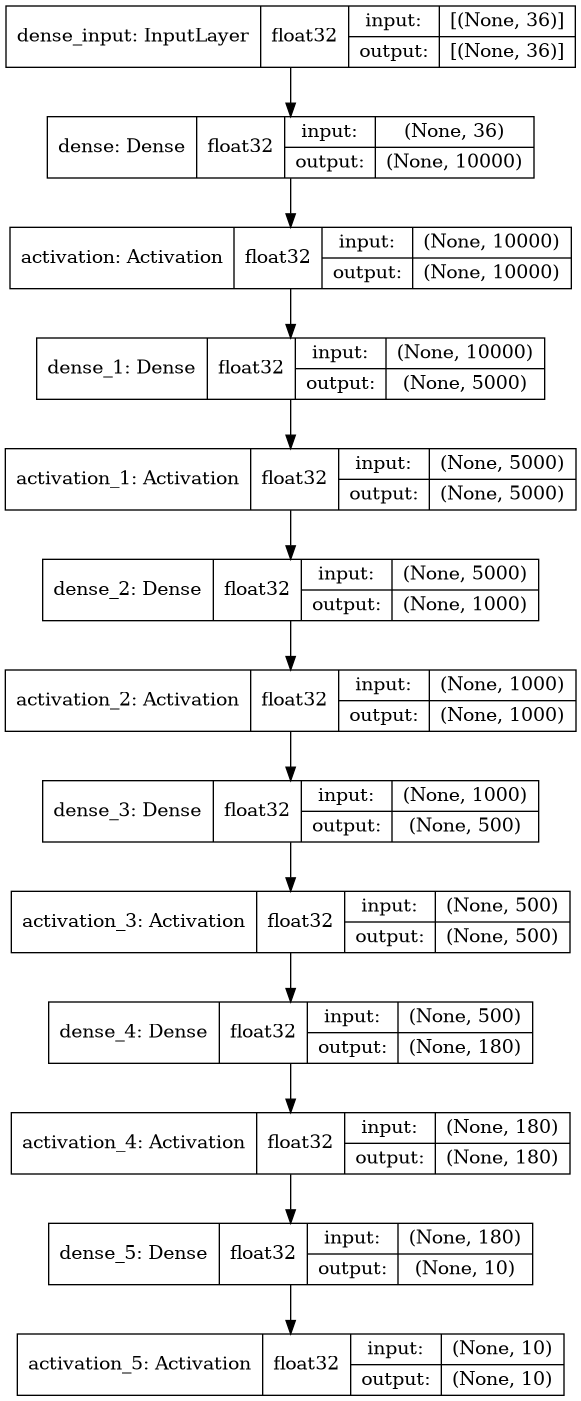

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf

model = Sequential()
model.add(Dense(10000, input_shape=(36, )))
model.add(Activation('sigmoid'))
model.add(Dense(5000))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(180))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

tf.keras.utils.plot_model(model,to_file="/home/master/Jibum/Motion_Show/HAR/MLP.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)


In [29]:
history = model.fit(x_train,y_train, epochs=10, validation_data = (x_val,y_val))

Epoch 1/10
22746/22746 [==============================] - 165s 7ms/step - loss: 0.7741 - accuracy: 0.7149 - val_loss: 0.6646 - val_accuracy: 0.7557
Epoch 2/10
22746/22746 [==============================] - 165s 7ms/step - loss: 0.6287 - accuracy: 0.7642 - val_loss: 0.5880 - val_accuracy: 0.7767
Epoch 3/10
22746/22746 [==============================] - 166s 7ms/step - loss: 0.5879 - accuracy: 0.7781 - val_loss: 0.5804 - val_accuracy: 0.7823
Epoch 4/10
22746/22746 [==============================] - 166s 7ms/step - loss: 0.5653 - accuracy: 0.7852 - val_loss: 0.5447 - val_accuracy: 0.7928
Epoch 5/10
22746/22746 [==============================] - 167s 7ms/step - loss: 0.5540 - accuracy: 0.7893 - val_loss: 0.5313 - val_accuracy: 0.7933
Epoch 6/10
22746/22746 [==============================] - 166s 7ms/step - loss: 0.5438 - accuracy: 0.7921 - val_loss: 0.5372 - val_accuracy: 0.7945
Epoch 7/10
22746/22746 [==============================] - 167s 7ms/step - loss: 0.5367 - accuracy: 0.7948 - val_

Text(0, 0.5, 'loss')

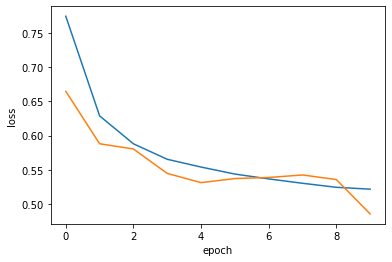

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

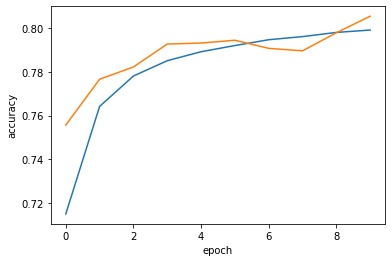

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [32]:
result = model.evaluate(x_test,y_test)

print(model.metrics_names)
print(result)
print("loss :", result[0])
print("Accuray :", result[1])

7108/7108 [==============================] - 12s 2ms/step - loss: 0.4922 - accuracy: 0.8046
['loss', 'accuracy']
[0.49218323826789856, 0.804617166519165]
loss : 0.49218323826789856
Accuray : 0.804617166519165


In [33]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Activation
# import tensorflow as tf

# model = Sequential()
# model.add(Dense(1000, input_shape=(12, )))
# model.add(Activation('sigmoid'))
# model.add(Dense(600))
# model.add(Activation('relu'))
# model.add(Dense(180))
# model.add(Activation('relu'))
# model.add(Dense(10))
# model.add(Activation('softmax'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary()

# tf.keras.utils.plot_model(model,to_file="/home/master/Jibum/Motion_Show/HAR/MLP.png",
#     show_shapes=True,
#     show_dtype=True,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96,
# )

# pcahistory = model.fit(pcax_train, pcay_train, epochs=30, validation_data = (pcax_val, pcay_val))

In [34]:
# plt.plot(pcahistory.history['loss'])
# plt.plot(pcahistory.history['val_loss'])
# plt.xlabel('epoch')
# plt.ylabel('loss')

In [35]:
# plt.plot(pcahistory.history['accuracy'])
# plt.plot(pcahistory.history['val_accuracy'])
# plt.xlabel('epoch')
# plt.ylabel('accuracy')

In [36]:
# result = model.evaluate(pcax_test,pcay_test)

# print(model.metrics_names)
# print(result)
# print("loss :", result[0])
# print("Accuray :", result[1])